# Topic

![Image](https://i.ytimg.com/vi/UM5bxbosgD8/maxresdefault.jpg)

In [108]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Data (obtained from Kaggle.com)

In [109]:
df = pd.read_csv(r"StudentsPerformance.csv")
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


| Group Letter | Meaning (common EEOC use)                                                                     |
| ------------ | --------------------------------------------------------------------------------------------- |
| Group A      | White (Not Hispanic)                                                                          |
| Group B      | Black or African American                                                                     |
| Group C      | Hispanic / Latino                                                                             |
| Group D      | Asian                                                                                         |
| Group E      | Native Hawaiian / Other Pacific Islander / American Indian / Alaskan Native (often collapsed) |


In [111]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


# Hypotheses:

1. Female students get better scores compared to their male classmates.
2. Students' ethnicity does not correlate with their scores.
3. Students whose parent hold higher degrees obtain better scores.
4. students eating standard lunch scored better than those eating a free/reduced price one.
5. Students who took Test preparation course got higher scores.
 

## The correlation pattern:
#### This step aimed to get a quick, visual overview of relationships across all numerical/binary variables in the dataset.

> From the heatmap below, we can see thsat the reading and writing scores are often highly correlated (r = 0.95).
This tells us that they measure similar abilities.
> Therefore: combining both columns will do the same job, while reducing the dimensions of the df.

<Axes: >

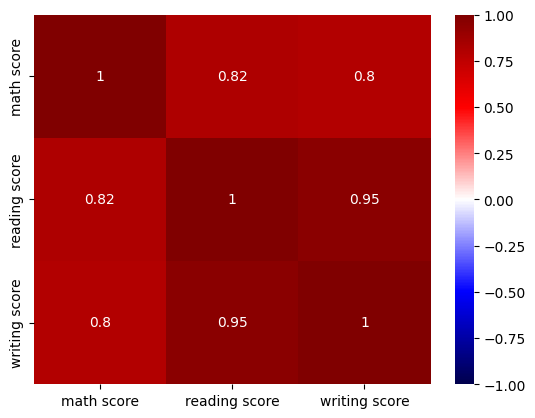

In [112]:
sns.heatmap(data = df.corr(numeric_only= True),annot = True, cmap = "seismic", vmin = -1)

#### **Converting categorical variables:**
To help add more variables to the correlation for better analysis.
##### gender, test preparation course, and lunch type were converted to binary (0/1):
- gender: female → 1, male → 0 (chosed alphabetically)
- test preparation course	completed → 1, none → 0 
- lunch	standard → 1,  free/reduced → 0 

##### parental level of education were converted to int values in the descending order:
- Master's degree    → 6
- Bachelor's degree  → 5
- Associate's degree → 4
- Some college       → 3
- High school        → 2
- Some high school   → 1



In [113]:
# gender
df["gender_bi"] = df["gender"].map({"male": 0, "female": 1})

# test preparation course
df["test_prep_bi"] = df["test preparation course"].map({"none": 0, "completed": 1})

# lunch
df["lunch_bi"] = df["lunch"].map({"free/reduced": 0, "standard": 1})

#parental level of education
education_map = {"some high school": 1, "high school": 2, "some college": 3, "associate's degree": 4, "bachelor's degree": 5, "master's degree": 6}
df["parental_ed"] = df["parental level of education"].map(education_map)
# to delete the old columns
df.drop(["gender", "test preparation course","lunch", "parental level of education"], axis = 1, inplace = True)
# to make sure all values were correctly replaced
df.info() # i have also checked every column using df["column"].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   race/ethnicity  1000 non-null   object
 1   math score      1000 non-null   int64 
 2   reading score   1000 non-null   int64 
 3   writing score   1000 non-null   int64 
 4   gender_bi       1000 non-null   int64 
 5   test_prep_bi    1000 non-null   int64 
 6   lunch_bi        1000 non-null   int64 
 7   parental_ed     1000 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 62.6+ KB


In [114]:
#Based on the initial heatmap, this step is to sum-up reading and writing columns  => language score 
df["language score"] = df["reading score"] + df["writing score"]
df.drop(["reading score", "writing score"], axis = 1, inplace = True)
df

,race/ethnicity,math score,gender_bi,test_prep_bi,lunch_bi,parental_ed,language score
0,group B,72,1,0,1,5,146
1,group C,69,1,1,1,3,178
2,group B,90,1,0,1,6,188
3,group A,47,0,0,0,4,101
4,group C,76,0,0,1,3,153
...,...,...,...,...,...,...,...
995,group E,88,1,1,1,6,194
996,group C,62,0,0,0,2,110
997,group C,59,1,1,0,2,136
998,group D,68,1,1,1,3,155


## It's time to repeat the heatmap after the modifications done to the df

<Axes: >

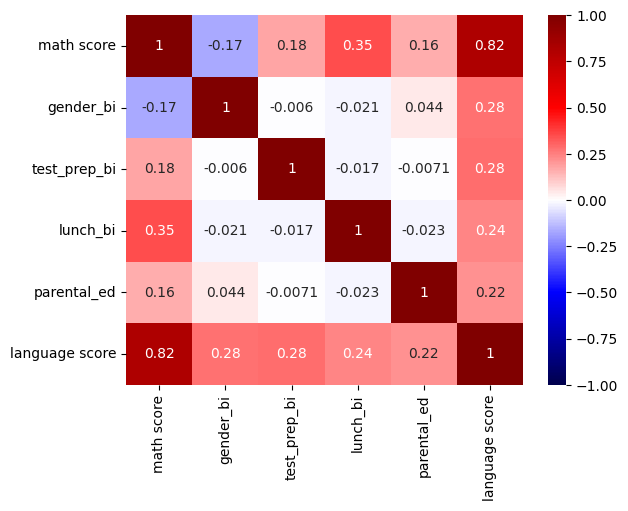

In [115]:

sns.heatmap(data = df.corr(numeric_only= True),annot = True, cmap = "seismic", vmin = -1)

### Back to the non binary variables:
To test the hypotheses, will revert back to the original data frame, only keeping the change of "language score"

In [116]:
df1 = pd.read_csv(r"StudentsPerformance.csv")
df1["language score"] = df1["reading score"] + df1["writing score"]
df1.drop(["reading score", "writing score"], axis = 1, inplace = True)
df1


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,language score
0,female,group B,bachelor's degree,standard,none,72,146
1,female,group C,some college,standard,completed,69,178
2,female,group B,master's degree,standard,none,90,188
3,male,group A,associate's degree,free/reduced,none,47,101
4,male,group C,some college,standard,none,76,153
...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,194
996,male,group C,high school,free/reduced,none,62,110
997,female,group C,high school,free/reduced,completed,59,136
998,female,group D,some college,standard,completed,68,155


# Hypothesis 1:
<span style="color: yellow;">Female students get better scores compared to their male classmates.</span>

In [117]:
df_gender = df1.groupby("gender")
df_gender.describe()

math score                                                       \
            count       mean        std   min   25%   50%   75%    max   
gender                                                                   
female      518.0  63.633205  15.491453   0.0  54.0  65.0  74.0  100.0   
male        482.0  68.728216  14.356277  27.0  59.0  69.0  79.0  100.0   

       language score                                                     \
                count        mean        std   min     25%    50%    75%   
gender                                                                     
female          518.0  145.075290  28.890511  27.0  127.25  146.0  165.0   
male            482.0  128.784232  27.697338  39.0  108.25  130.0  150.0   

               
          max  
gender         
female  200.0  
male    200.0

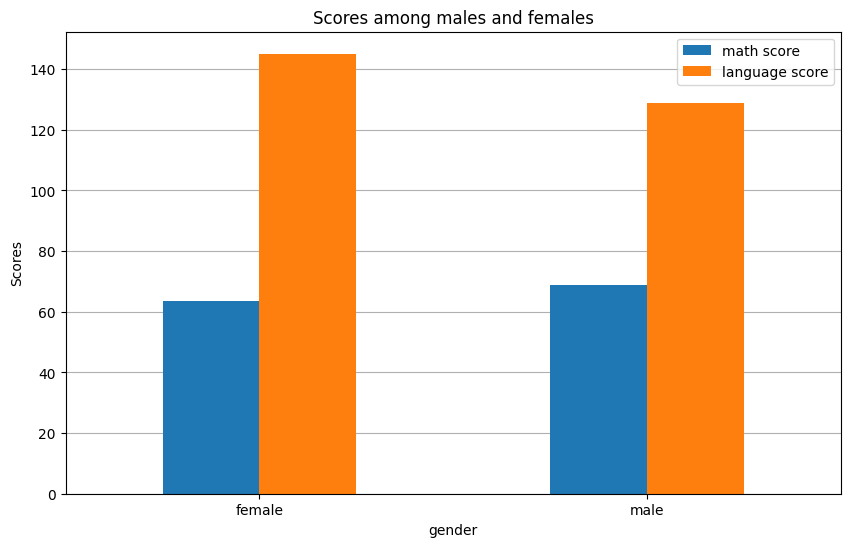

In [118]:
means1 = df_gender[[ "math score", 'language score']].mean()
ax = means1.plot(kind="bar", figsize=(10, 6), rot = 0, ylabel = "Scores", title = "Scores among males and females")
plt.legend(loc="upper right")
plt.grid(True, axis='y')
ax.set_axisbelow(True)


<span style = "color:cyan;">This suggests that female students tend to have better academic performance in language, while male students do better in  math test.</span>

# Hypothesis 2:
<span style="color: yellow;">Students' ethnicity does not correlate with their scores.</span>


In [119]:
df_race = df1.groupby("race/ethnicity")
df_race.describe()

math score                                                 \
                    count       mean        std   min    25%   50%   75%   
race/ethnicity                                                             
group A              89.0  61.629213  14.523008  28.0  51.00  61.0  71.0   
group B             190.0  63.452632  15.468191   8.0  54.00  63.0  74.0   
group C             319.0  64.463950  14.852666   0.0  55.00  65.0  74.0   
group D             262.0  67.362595  13.769386  26.0  59.00  69.0  77.0   
group E             140.0  73.821429  15.534259  30.0  64.75  74.5  85.0   

                      language score                                       \
                  max          count        mean        std   min     25%   
race/ethnicity                                                              
group A         100.0           89.0  127.348315  30.640548  42.0  103.00   
group B          97.0          190.0  132.952632  30.526298  39.0  112.00   
group C          98.0          319.0  136.931034  28.639073  27.0  117.00   
group D         100.0          262.0  140.175573  27.898003  66.0  122.25   
group E         100.0          140.0  144.435714  29.667755  48.0  126.75   

                                      
                  50%     75%    max  
race/ethnicity                        
group A         125.0  146.00  197.0  
group B         134.0  157.00  193.0  
group C         140.0  156.00  200.0  
group D         143.0  158.75  200.0  
group E         146.0  165.00  200.0

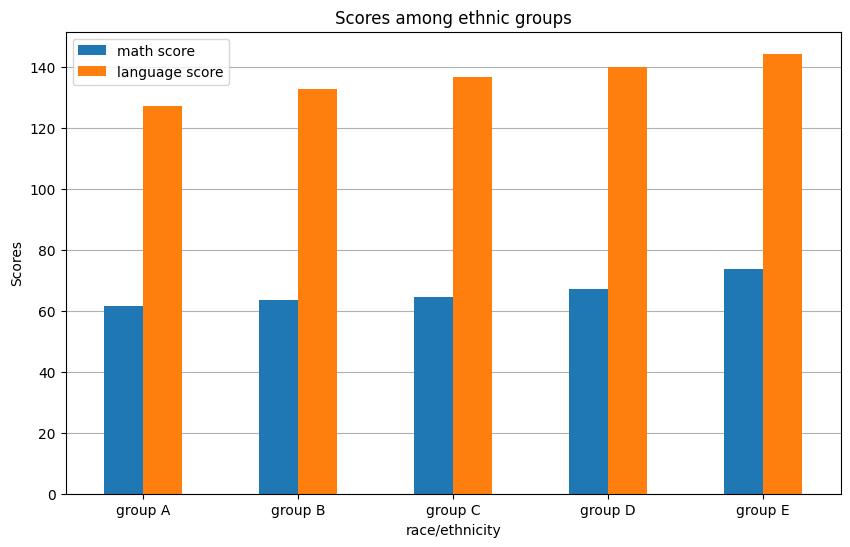

In [120]:
means2 = df_race[[ "math score", 'language score']].mean()
ax = means2.plot(kind="bar", figsize=(10, 6), rot = 0, ylabel = "Scores", title = "Scores among ethnic groups")
plt.legend(loc="upper left")
plt.grid(True, axis='y')
ax.set_axisbelow(True)


# Hypothesis 3:
<span style="color: yellow;">Students whose parent hold higher degrees obtain better scores.</span>


In [121]:
# Parents' education in an ascending order
education_order = ['some high school','high school','some college',
                "associate's degree","bachelor's degree","master's degree"]

# Get unique values from your data and sort them according to your defined order
existing_levels = [level for level in education_order if level in df1['parental level of education'].unique()]

# Convert to categorical and sort
df1['parental level of education'] = pd.Categorical(df1['parental level of education'], categories=existing_levels, ordered=True)
df_sorted = df1.sort_values('parental level of education')
df_ed = df1.groupby("parental level of education")
df_ed.describe()



C:\Users\notey\AppData\Local\Temp\ipykernel_18028\2920755605.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_ed = df1.groupby("parental level of education")


math score                                     \
                                 count       mean        std   min    25%   
parental level of education                                                 
some high school                 179.0  63.497207  15.927989   0.0  53.00   
high school                      196.0  62.137755  14.539651   8.0  53.75   
some college                     226.0  67.128319  14.312897  19.0  59.00   
associate's degree               222.0  67.882883  15.112093  26.0  57.00   
bachelor's degree                118.0  69.389831  14.943789  29.0  61.00   
master's degree                   59.0  69.745763  15.153915  40.0  55.50   

                                               language score              \
                              50%   75%    max          count        mean   
parental level of education                                                 
some high school             65.0  74.0   97.0          179.0  131.826816   
high school                  63.0  72.0   99.0          196.0  127.153061   
some college                 67.5  76.0  100.0          226.0  138.300885   
associate's degree           67.0  80.0  100.0          222.0  140.824324   
bachelor's degree            68.0  79.0  100.0          118.0  146.381356   
master's degree              73.0  81.0   95.0           59.0  151.050847   

                                                                            
                                   std   min     25%    50%     75%    max  
parental level of education                                                 
some high school             30.884856  27.0  111.00  134.0  156.50  200.0  
high school                  27.844017  39.0  106.75  131.0  146.25  199.0  
some college                 28.740026  42.0  120.25  140.5  158.75  199.0  
associate's degree           27.833226  69.0  119.00  143.5  160.00  200.0  
bachelor's degree            28.752382  80.0  127.00  146.0  165.50  200.0  
master's degree              27.108609  88.0  132.50  152.0  171.50  200.0

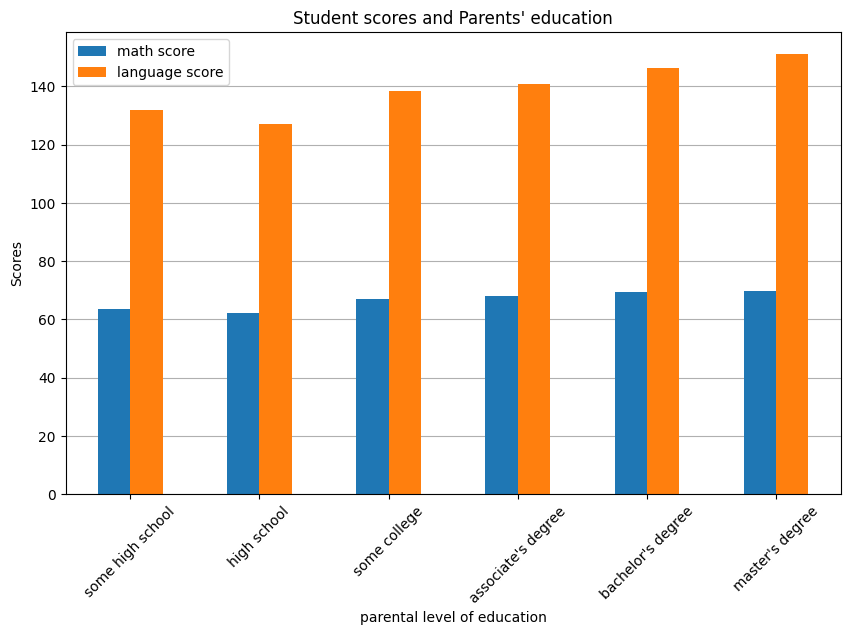

In [122]:
means3 = df_ed[[ "math score", 'language score']].mean()
ax = means3.plot(kind="bar", figsize=(10, 6), rot = 45, ylabel = "Scores", title = "Student scores and Parents' education")
plt.legend(loc="upper left")
plt.grid(True, axis='y')
ax.set_axisbelow(True)

<span style = "color:cyan;">This suggests students whose parents hold higher degrees have better academic outcomes.</span>

# Hypothesis 4:
<span style="color: yellow;">Students eating standard lunch (propably indicating their higher economic status) scored better than those eating a free/reduced price one.</span>

In [123]:
df_lunch = df1.groupby("lunch")
df_lunch.describe()

math score                                                       \
                  count       mean        std   min   25%   50%   75%    max   
lunch                                                                          
free/reduced      355.0  58.921127  15.159956   0.0  49.0  60.0  69.0  100.0   
standard          645.0  70.034109  13.653501  19.0  61.0  69.0  80.0  100.0   

             language score                                                    \
                      count        mean        std   min    25%    50%    75%   
lunch                                                                           
free/reduced          355.0  127.676056  29.992643  27.0  109.0  128.0  149.5   
standard              645.0  142.477519  27.812899  48.0  125.0  144.0  161.0   

                     
                max  
lunch                
free/reduced  200.0  
standard      200.0

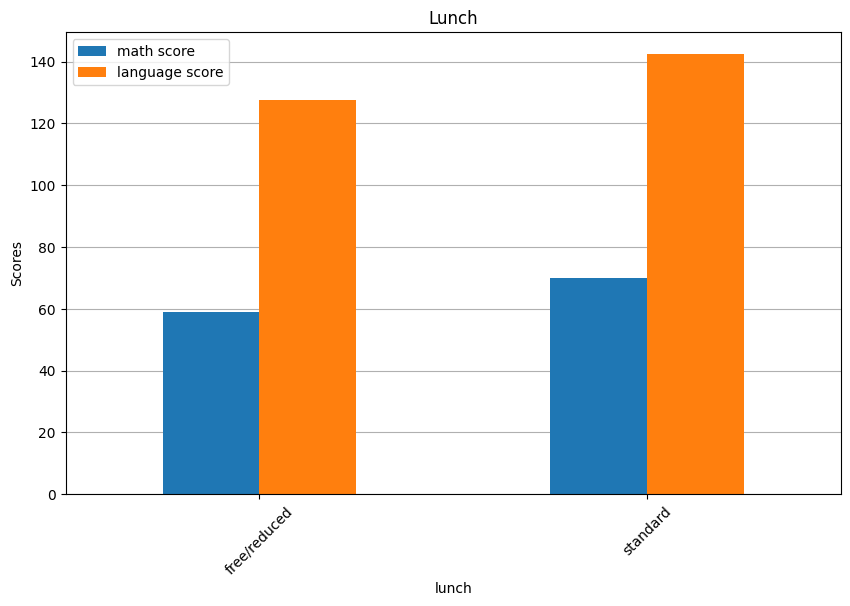

In [124]:
means4 = df_lunch[[ "math score", 'language score']].mean()
ax = means4.plot(kind="bar", figsize=(10, 6), rot = 45, ylabel = "Scores", title = "Lunch")
plt.grid(True, axis='y')
ax.set_axisbelow(True)
ax.legend(loc="upper left")

<span style = "color:cyan;">This suggests that higher economic status is associated with better student outcomes across both academic domains.</span>

# Hypothesis 5:
<span style="color: yellow;" >Students who took Test preparation course got higher scores.</span>

In [125]:
df_test = df1.groupby("test preparation course")
df_test.describe()

math score                                          \
                             count       mean        std   min   25%   50%   
test preparation course                                                      
completed                    358.0  69.695531  14.444699  23.0  60.0  69.0   
none                         642.0  64.077882  15.192376   0.0  54.0  64.0   

                                      language score                         \
                           75%    max          count        mean        std   
test preparation course                                                       
completed                79.00  100.0          358.0  148.312849  26.651972   
none                     74.75  100.0          642.0  131.038941  29.148392   

                                                           
                          min    25%    50%    75%    max  
test preparation course                                    
completed                77.0  132.0  151.0  167.0  200.0  
none                     27.0  111.0  132.0  151.0  200.0

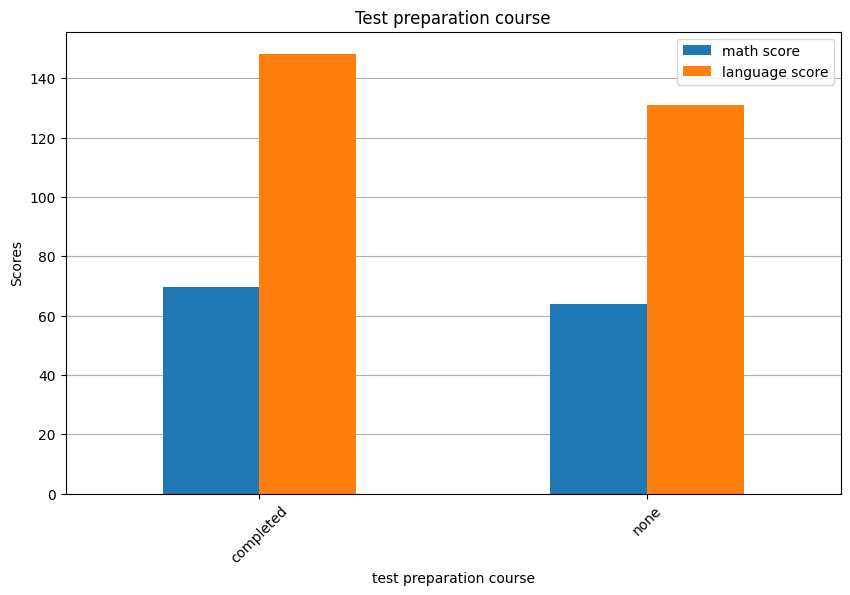

In [126]:
means5 = df_test[[ "math score", 'language score']].mean()
ax = means5.plot(kind="bar", figsize=(10, 6), rot = 45, ylabel = "Scores", title = "Test preparation course")
plt.grid(True, axis='y')
ax.set_axisbelow(True)
ax.legend(loc="upper right")

<span style = "color:cyan;">This suggests that completing the test preparation course is associated with better student outcomes across the two academic domains.</span>